<a href="https://colab.research.google.com/github/RobMarlin/GIT-Lecture/blob/master/Copy_of_Copy_of_Charge_Location_Based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/fastai/fastai
!pip install -e "fastai[dev]"

Cloning into 'fastai'...
remote: Enumerating objects: 18434, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 18434 (delta 8), reused 15 (delta 6), pack-reused 18406
Receiving objects: 100% (18434/18434), 768.46 MiB | 35.80 MiB/s, done.
Resolving deltas: 100% (14552/14552), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/fastai
     |████████████████████████████████| 61 kB 5.0 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 585 kB 34.0 MB/s 
     |████████████████████████████████| 259 kB 84.6 MB/s 
     |████████████████████████████████| 4.4 MB 73.4 MB/s 
     |████████████████████████████████| 1.2 MB 70.4 MB/s 
     |████████████████████████████████| 2.0 MB 72.9 MB/s 
     |████████████████████████████████| 446 kB 80.8 MB/s 
     |████████████████████████████████| 1.4 MB 77.6 MB/s 
   

In [ ]:
# **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = False # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

  Running command git clone -q https://github.com/timeseriesAI/tsai.git /tmp/pip-req-build-vnq3w053


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
os.listdir()

['.config', 'ChargeStations.xlsx', 'drive', 'fastai', 'sample_data']

In [ ]:
border = pd.read_excel("ChargeStations.xlsx", sheet_name="border communities", header=None)

In [ ]:
border.columns = ["dropoff", "b1","b2","b3","b4","b5","b6","b7","b8"]

In [ ]:
border.head()

,dropoff,b1,b2,b3,b4,b5,b6,b7,b8
0,1,2,77.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,77.0,4.0,13.0,NaN,NaN,NaN,NaN
2,3,77,4.0,5.0,6.0,NaN,NaN,NaN,NaN
3,4,77,2.0,13.0,14.0,5.0,3.0,NaN,NaN
4,5,4,14.0,16.0,21.0,7.0,6.0,NaN,NaN


In [ ]:
border

,dropoff,b1,b2,b3,b4,b5,b6,b7,b8
0,1,2,77.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,77.0,4.0,13.0,NaN,NaN,NaN,NaN
2,3,77,4.0,5.0,6.0,NaN,NaN,NaN,NaN
3,4,77,2.0,13.0,14.0,5.0,3.0,NaN,NaN
4,5,4,14.0,16.0,21.0,7.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
72,73,71,72.0,75.0,49.0,NaN,NaN,NaN,NaN
73,74,72,75.0,NaN,NaN,NaN,NaN,NaN,NaN
74,75,72,74.0,53.0,49.0,73.0,NaN,NaN,NaN
75,76,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_parquet("drive/MyDrive/df_batched.pq")

In [ ]:
df.head()

,ev_id,ev_model,range_km,charge,start_datetime,battery_Wh,Wh_Km,trip_km,pickup,dropoff,...,start_dayhour,start_daymin,start_daymonth,start_dayday,end_dayhour,end_daymin,end_daymonth,end_dayday,duration,batch_id
0,0,Tesla_Model_3,232.6,0,2016-01-01 10:00:00,34742.4,268.2,1.8,8,7,...,10,0,1,1,10,15,1,1,900,0
1,0,Tesla_Model_3,230.8,0,2016-01-01 10:45:00,34474.2,745.0,5.0,8,33,...,10,45,1,1,11,0,1,1,900,0
2,0,Tesla_Model_3,225.8,0,2016-01-01 11:15:00,33729.2,1013.2,6.8,8,6,...,11,15,1,1,11,30,1,1,900,0
3,0,Tesla_Model_3,219.0,0,2016-01-01 11:45:00,32716.0,208.6,1.4,7,8,...,11,45,1,1,11,45,1,1,0,0
4,0,Tesla_Model_3,217.6,0,2016-01-01 11:45:00,32507.4,268.2,1.8,8,32,...,11,45,1,1,12,0,1,1,900,0


In [ ]:
df = df.merge(border, how='left')

In [ ]:
df.head()

,ev_id,ev_model,range_km,charge,start_datetime,battery_Wh,Wh_Km,trip_km,pickup,dropoff,...,duration,batch_id,b1,b2,b3,b4,b5,b6,b7,b8
0,0,Tesla_Model_3,232.6,0,2016-01-01 10:00:00,34742.4,268.2,1.8,8,7,...,900,0,6,5.0,22.0,24.0,8.0,NaN,NaN,NaN
1,0,Tesla_Model_3,230.8,0,2016-01-01 10:45:00,34474.2,745.0,5.0,8,33,...,900,0,32,28.0,34.0,35.0,NaN,NaN,NaN,NaN
2,0,Tesla_Model_3,225.8,0,2016-01-01 11:15:00,33729.2,1013.2,6.8,8,6,...,900,0,3,5.0,7.0,NaN,NaN,NaN,NaN,NaN
3,0,Tesla_Model_3,219.0,0,2016-01-01 11:45:00,32716.0,208.6,1.4,7,8,...,0,0,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
4,0,Tesla_Model_3,217.6,0,2016-01-01 11:45:00,32507.4,268.2,1.8,8,32,...,900,0,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['ev_id', 'ev_model', 'range_km', 'charge', 'start_datetime',
       'battery_Wh', 'Wh_Km', 'trip_km', 'pickup', 'dropoff', 'end_datetime',
       'start_dayhour', 'start_daymin', 'start_daymonth', 'start_dayday',
       'end_dayhour', 'end_daymin', 'end_daymonth', 'end_dayday', 'duration',
       'batch_id', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'],
      dtype='object')

In [ ]:
df_dropoff = df[df["charge"]==1].copy()

In [ ]:
df_dropoff.head()

,ev_id,ev_model,range_km,charge,start_datetime,battery_Wh,Wh_Km,trip_km,pickup,dropoff,...,duration,batch_id,b1,b2,b3,b4,b5,b6,b7,b8
28,0,Tesla_Model_3,335.0,1,2016-01-04 17:15:00,50000.0,208.6,1.4,32,28,...,900,2,24,27.0,29.0,31.0,33.0,32.0,NaN,NaN
91,0,Tesla_Model_3,335.0,1,2016-01-12 08:15:00,50000.0,163.9,1.1,8,8,...,900,3,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
122,0,Tesla_Model_3,335.0,1,2016-01-16 10:00:00,50000.0,119.2,0.8,8,8,...,0,4,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
153,0,Tesla_Model_3,335.0,1,2016-01-20 05:45:00,50000.0,476.8,3.2,8,32,...,900,5,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN
185,0,Tesla_Model_3,335.0,1,2016-01-28 07:00:00,50000.0,283.1,1.9,8,32,...,900,7,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
evid_range = df.groupby("ev_id").agg(evid_range=('range_km','max')).reset_index()
evid_range

,ev_id,evid_range
0,0,335.0
1,3,360.0
2,4,383.0
3,5,185.0
4,7,185.0
...,...,...
3549,8750,185.0
3550,8751,179.0
3551,8753,143.0
3552,8758,390.0


In [ ]:
evid_range["evid_80"] = evid_range["evid_range"] * 0.2

In [ ]:
evid_range

,ev_id,evid_range,evid_80
0,0,335.0,67.0
1,3,360.0,72.0
2,4,383.0,76.6
3,5,185.0,37.0
4,7,185.0,37.0
...,...,...,...
3549,8750,185.0,37.0
3550,8751,179.0,35.8
3551,8753,143.0,28.6
3552,8758,390.0,78.0


In [ ]:
df[df["batch_id"]==22]

,ev_id,ev_model,range_km,charge,start_datetime,battery_Wh,Wh_Km,trip_km,pickup,dropoff,...,duration,batch_id,b1,b2,b3,b4,b5,b6,b7,b8
834,0,Tesla_Model_3,335.0,1,2016-04-04 15:15:00,50000.0,283.1,1.9,8,8,...,900,22,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
835,0,Tesla_Model_3,333.1,0,2016-04-04 15:30:00,49716.9,238.4,1.6,8,8,...,0,22,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
836,0,Tesla_Model_3,331.5,0,2016-04-04 15:45:00,49478.5,268.2,1.8,8,32,...,0,22,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN
837,0,Tesla_Model_3,329.7,0,2016-04-04 15:45:00,49210.3,208.6,1.4,32,28,...,900,22,24,27.0,29.0,31.0,33.0,32.0,NaN,NaN
838,0,Tesla_Model_3,328.3,0,2016-04-04 16:00:00,49001.7,312.9,2.1,28,8,...,0,22,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
839,0,Tesla_Model_3,326.2,0,2016-04-04 16:30:00,48688.8,283.1,1.9,8,24,...,0,22,22,23.0,28.0,8.0,7.0,NaN,NaN,NaN
840,0,Tesla_Model_3,324.3,0,2016-04-04 17:00:00,48405.7,625.8,4.2,8,28,...,1800,22,24,27.0,29.0,31.0,33.0,32.0,NaN,NaN
841,0,Tesla_Model_3,320.1,0,2016-04-04 17:45:00,47779.9,670.5,4.5,32,24,...,1800,22,22,23.0,28.0,8.0,7.0,NaN,NaN,NaN
842,0,Tesla_Model_3,315.6,0,2016-04-04 18:30:00,47109.4,1251.6,8.4,8,24,...,1800,22,22,23.0,28.0,8.0,7.0,NaN,NaN,NaN
843,0,Tesla_Model_3,239.2,0,2016-04-05 06:30:00,35725.8,342.7,2.3,8,32,...,900,22,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dropoff = df.groupby("batch_id").tail(1)

In [ ]:
df_dropoff

,ev_id,ev_model,range_km,charge,start_datetime,battery_Wh,Wh_Km,trip_km,pickup,dropoff,...,duration,batch_id,b1,b2,b3,b4,b5,b6,b7,b8
27,0,Tesla_Model_3,76.7,0,2016-01-03 07:15:00,11513.3,357.6,2.4,32,8,...,900,0,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
90,0,Tesla_Model_3,47.6,0,2016-01-12 06:45:00,7177.4,476.8,3.2,8,32,...,900,2,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN
121,0,Tesla_Model_3,136.2,0,2016-01-15 11:00:00,20378.8,387.4,2.6,32,24,...,900,3,22,23.0,28.0,8.0,7.0,NaN,NaN,NaN
152,0,Tesla_Model_3,89.6,0,2016-01-19 09:30:00,13435.4,1221.8,8.2,8,35,...,900,4,33,34.0,38.0,36.0,NaN,NaN,NaN,NaN
184,0,Tesla_Model_3,88.4,0,2016-01-23 17:15:00,13256.6,387.4,2.6,8,8,...,900,5,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872000,999,Hyundai_Loniq_EV,54.4,0,2016-11-21 13:45:00,4356.8,103.2,0.6,5,5,...,900,279207,4,14.0,16.0,21.0,7.0,6.0,NaN,NaN
10872026,999,Hyundai_Loniq_EV,78.5,0,2016-11-29 06:45:00,8502.0,877.2,5.1,6,3,...,900,279208,77,4.0,5.0,6.0,NaN,NaN,NaN,NaN
10872077,999,Hyundai_Loniq_EV,51.9,0,2016-12-07 01:00:00,3926.8,2580.0,15.0,76,17,...,900,279209,76,18.0,19.0,15.0,NaN,NaN,NaN,NaN
10872117,999,Hyundai_Loniq_EV,71.8,0,2016-12-14 15:00:00,7349.6,223.6,1.3,8,8,...,0,279211,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dropoff.columns

Index(['ev_id', 'ev_model', 'range_km', 'charge', 'start_datetime',
       'battery_Wh', 'Wh_Km', 'trip_km', 'pickup', 'dropoff', 'end_datetime',
       'start_dayhour', 'start_daymin', 'start_daymonth', 'start_dayday',
       'end_dayhour', 'end_daymin', 'end_daymonth', 'end_dayday', 'duration',
       'batch_id', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'],
      dtype='object')

In [ ]:
feats = ['ev_id', 'range_km', 'charge', 'battery_Wh', 'trip_km', 'pickup', 'dropoff',
         'b1','b2','b3','b4','b5','b6','b7','b8']

In [ ]:
df_dropoff = df_dropoff[feats].copy()

In [ ]:
df_dropoff.head()

,ev_id,range_km,charge,battery_Wh,trip_km,pickup,dropoff,b1,b2,b3,b4,b5,b6,b7,b8
27,0,76.7,0,11513.3,2.4,32,8,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
90,0,47.6,0,7177.4,3.2,8,32,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN
121,0,136.2,0,20378.8,2.6,32,24,22,23.0,28.0,8.0,7.0,NaN,NaN,NaN
152,0,89.6,0,13435.4,8.2,8,35,33,34.0,38.0,36.0,NaN,NaN,NaN,NaN
184,0,88.4,0,13256.6,2.6,8,8,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dropoff = pd.get_dummies(df_dropoff, columns=["b1","b2","b3","b4"])

In [ ]:
df_dropoff.fillna(0,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_dropoff.drop('dropoff',axis=1), df_dropoff['dropoff'])

In [ ]:
X_train.head()

,ev_id,range_km,charge,battery_Wh,trip_km,pickup,b5,b6,b7,b8,...,b4_60.0,b4_61.0,b4_63.0,b4_66.0,b4_67.0,b4_69.0,b4_71.0,b4_72.0,b4_73.0,b4_75.0
4602885,4256,81.5,0,3016.5,5.8,11,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5708024,5071,63.4,0,9531.6,1.8,28,33.0,32.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4729708,433,62.4,0,5732.8,6.9,77,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3861850,375,66.1,0,9933.9,1.4,32,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8176074,6922,59.5,0,9685.0,0.3,32,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# build the lightgbm model
import lightgbm as lgb
#clf = lgb.LGBMClassifier(max_depth=5)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [ ]:
# predict the results
y_pred=clf.predict(X_val)

In [ ]:
clf.predict(X_val)

array([ 8, 32, 24, ...,  8,  7, 32])

In [ ]:
clf_prob = clf.predict_proba(X_val)

In [ ]:
clf_prob[2000]

array([7.94270310e-03, 6.71388770e-03, 2.77057204e-02, 1.08041313e-02,
       1.26753280e-02, 1.93342855e-01, 8.64323946e-02, 2.21250635e-01,
       4.24236833e-04, 2.30796555e-03, 2.04863728e-03, 1.22812239e-03,
       1.69801848e-03, 5.49113555e-03, 3.38864857e-03, 8.57692522e-03,
       9.10425749e-04, 1.82774652e-04, 1.42341726e-03, 7.19456705e-04,
       5.91106187e-03, 1.72834674e-02, 1.94633417e-03, 4.69387407e-02,
       1.03785829e-03, 1.97164142e-04, 6.94048985e-04, 8.06802806e-02,
       8.81736844e-04, 6.40110602e-04, 3.57314423e-03, 1.54304356e-01,
       3.33577100e-02, 2.90762099e-03, 3.13906677e-03, 3.30245563e-04,
       1.33653203e-04, 9.97002578e-04, 1.91618310e-03, 2.85928882e-04,
       6.43792350e-03, 7.61296877e-04, 6.70814457e-04, 3.03562624e-04,
       7.33622088e-05, 1.63660747e-04, 1.72870649e-05, 9.63865544e-05,
       4.86468116e-04, 4.67229911e-05, 5.03620660e-05, 1.46976686e-05,
       4.93083603e-03, 2.30359025e-04, 5.35265637e-04, 7.55976050e-04,
      

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_val, y_pred)


In [ ]:
accuracy

0.7392109789985066

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix\n\n', cm)
# print('\nTrue Positives(TP) = ', cm[0,0])
# print('\nTrue Negatives(TN) = ', cm[1,1])
# print('\nFalse Positives(FP) = ', cm[0,1])
# print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


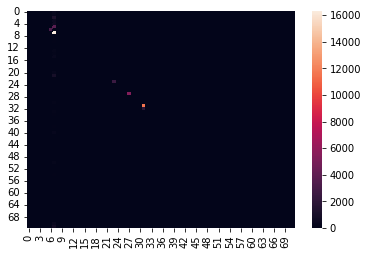

In [ ]:
sns.heatmap(cm)

In [ ]:
# # visualize confusion matrix with seaborn heatmap

# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
df.head()

,ev_id,ev_model,range_km,charge,start_datetime,battery_Wh,Wh_Km,trip_km,pickup,dropoff,...,duration,batch_id,b1,b2,b3,b4,b5,b6,b7,b8
0,0,Tesla_Model_3,232.6,0,2016-01-01 10:00:00,34742.4,268.2,1.8,8,7,...,900,0,6,5.0,22.0,24.0,8.0,NaN,NaN,NaN
1,0,Tesla_Model_3,230.8,0,2016-01-01 10:45:00,34474.2,745.0,5.0,8,33,...,900,0,32,28.0,34.0,35.0,NaN,NaN,NaN,NaN
2,0,Tesla_Model_3,225.8,0,2016-01-01 11:15:00,33729.2,1013.2,6.8,8,6,...,900,0,3,5.0,7.0,NaN,NaN,NaN,NaN,NaN
3,0,Tesla_Model_3,219.0,0,2016-01-01 11:45:00,32716.0,208.6,1.4,7,8,...,0,0,7,24.0,32.0,NaN,NaN,NaN,NaN,NaN
4,0,Tesla_Model_3,217.6,0,2016-01-01 11:45:00,32507.4,268.2,1.8,8,32,...,900,0,8,28.0,33.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(10872157, 29)

In [ ]:
df["batch_id"].nunique()

211602

In [ ]:
padded_df = pd.read_csv("drive/MyDrive/df_padded.pq")

In [ ]:
padded_df.head(1)

,Unnamed: 0,ev_id,range_km,charge,battery_Wh,Wh_Km,trip_km,pickup,dropoff,start_dayhour,start_daymin,start_daymonth,start_dayday,end_dayhour,end_daymin,end_daymonth,end_dayday,duration,batch_id,count
0,0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

NameError: ignored

In [ ]:
padded_df = padded_df.merge(border, how='left')

In [ ]:
#df = df.loc[:,["dropoff","b1","b2","b3","b4","b5","b6","b7","b8"]].copy()

In [ ]:
padded_df.sample(10)

,Unnamed: 0,ev_id,range_km,charge,battery_Wh,Wh_Km,trip_km,pickup,dropoff,start_dayhour,...,batch_id,count,b1,b2,b3,b4,b5,b6,b7,b8
7478930,3995,3919,173.9,0,31135.2,974.4,5.8,3,14,2,...,104308,3,13.0,12.0,16.0,4.0,NaN,NaN,NaN,NaN
8458305,42,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15188086,1,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9915929,1375,4861,76.6,0,12592.0,799.0,4.7,32,33,9,...,138744,23,32.0,28.0,34.0,35.0,NaN,NaN,NaN,NaN
9862165,1490,4849,216.4,0,32220.8,498.8,2.9,8,7,9,...,138064,11,6.0,5.0,22.0,24.0,8.0,NaN,NaN,NaN
3021897,21,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14946539,14,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15290024,857,703,217.2,0,32358.4,1685.6,9.8,8,5,0,...,213550,9,4.0,14.0,16.0,21.0,7.0,6.0,NaN,NaN
15765172,16,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90005,14,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = padded_df.groupby("batch_id").last()["dropoff"].values

In [ ]:
len(y)

201580

Text(0.5, 1.0, 'Distribution of Dropoff batches')

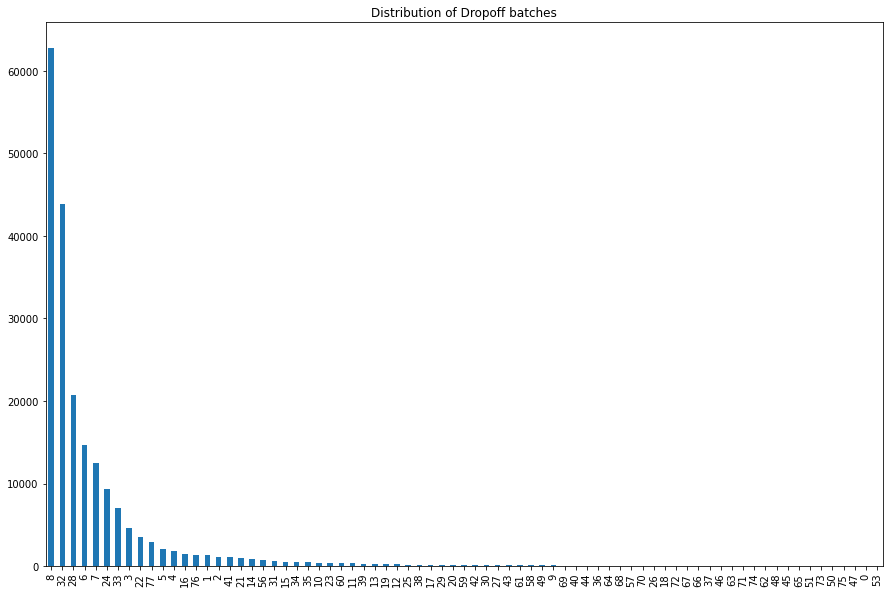

In [ ]:

plt.figure(figsize=(15,10))
pd.DataFrame(y)[0].value_counts().plot(kind='bar')
plt.title("Distribution of Dropoff batches")

In [ ]:
new_y = y[:]

In [ ]:
low_val = pd.DataFrame(y)[0].value_counts().iloc[-20:].index

In [ ]:
mod_y = []
for v in y:
    if v in low_val:
        mod_y.append('8')
    else:
        mod_y.append(v)

In [ ]:
padded_df.columns

Index(['Unnamed: 0', 'ev_id', 'range_km', 'charge', 'battery_Wh', 'Wh_Km',
       'trip_km', 'pickup', 'dropoff', 'start_dayhour', 'start_daymin',
       'start_daymonth', 'start_dayday', 'end_dayhour', 'end_daymin',
       'end_daymonth', 'end_dayday', 'duration', 'batch_id', 'count', 'b1',
       'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'],
      dtype='object')

In [ ]:
data_cols = ['range_km', 'charge', 'battery_Wh', 'Wh_Km', 'trip_km',
       'pickup',  'start_dayhour', 'start_daymin', 'start_daymonth',
       'start_dayday', 'end_dayhour', 'end_daymin', 'end_daymonth',
       'end_dayday', 'duration', 'batch_id', 'b1','b2','b3', 'b4', 'b5', 'b6', 'b7', 'b8']

In [ ]:
padded_df_20 = padded_df.groupby('batch_id').tail(20)

In [ ]:
padded_df_20['batch_id'].value_counts()


2         20
185314    20
185316    20
185317    20
185318    20
          ..
92863     20
92864     20
92865     20
92866     20
279215    20
Name: batch_id, Length: 201580, dtype: int64

In [ ]:
from fastai.tabular.all import *
path = Path('.')
from tsai.all import *
computer_setup()

os              : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python          : 3.7.13
tsai            : 0.3.2
fastai          : 2.7.4
fastcore        : 1.4.5
torch           : 1.11.0+cu113
device          : 1 gpu (['Tesla V100-SXM2-16GB'])
cpu cores       : 4
threads per cpu : 2
RAM             : 51.0 GB
GPU memory      : [15.78] GB


In [ ]:
padded_df_20 = padded_df_20.copy()

In [ ]:
padded_df_20.fillna(0,inplace=True)

In [ ]:
res = df2np3d(padded_df_20, ['batch_id'], data_cols=data_cols )

In [ ]:
res.shape

(201580, 24, 20)

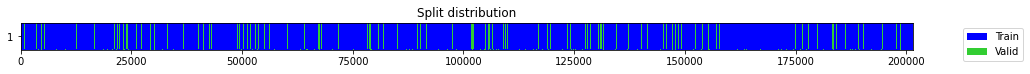

((#181422) [43520,42989,9841,71257,93011,104370,184166,6077,3416,134109...],
 (#20158) [135529,47288,78351,32995,110237,60243,154718,152192,33485,196309...])

In [ ]:
splits = get_splits(mod_y, valid_size=.1, stratify=True, random_state=23, shuffle=True)
splits



tfm: TSToPlot - batch shape: torch.Size([64, 3, 224, 224])


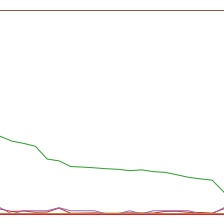



tfm: TSToMat - batch shape: torch.Size([64, 3, 224, 224])


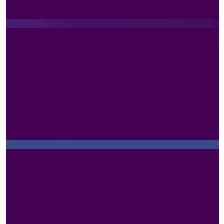



tfm: TSToGADF - batch shape: torch.Size([64, 24, 224, 224])


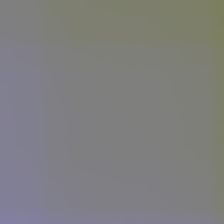



tfm: TSToGASF - batch shape: torch.Size([64, 24, 224, 224])


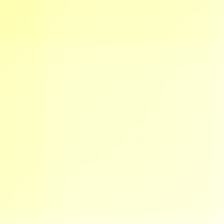



tfm: TSToMTF - batch shape: torch.Size([64, 24, 224, 224])


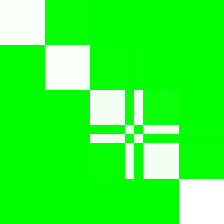



tfm: TSToRP - batch shape: torch.Size([64, 24, 224, 224])


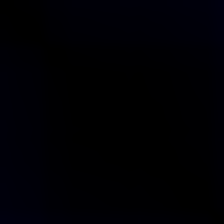

In [ ]:
tfms = [None, Categorize()]
bts = [[TSNormalize(), TSToPlot()], 
       [TSNormalize(), TSToMat(cmap='viridis')],
       [TSNormalize(), TSToGADF(cmap='spring')],
       [TSNormalize(), TSToGASF(cmap='summer')],
       [TSNormalize(), TSToMTF(cmap='autumn')],
       [TSNormalize(), TSToRP(cmap='winter')]]
btns = ['Plot', 'Mat', 'GADF', 'GASF', 'MTF', 'RP']
for i, (bt, btn) in enumerate(zip(bts, btns)):
    dsets = TSDatasets(res, mod_y, tfms=tfms, splits=splits)
    dls = TSDataLoaders.from_dsets(dsets.train,
                                   dsets.valid,
                                   bs=[64, 128],
                                   batch_tfms=bt,
                                   shuffle=False)
    xb, yb = dls.train.one_batch()
    print(f'\n\ntfm: TSTo{btn} - batch shape: {xb.shape}')
    xb[0].show()
    plt.show()

In [ ]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(res, mod_y, tfms=tfms, splits=splits, inplace=True, )
dsets

(#201580) [(TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(53)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(24)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(15)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(27)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(53)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(53)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(52)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(19)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(49)), (TSTensor(vars:24, len:20, device=cpu, dtype=torch.float32), TensorCategory(53))] ...]

In [ ]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, batch_tfms=[TSStandardize()], num_workers=0)

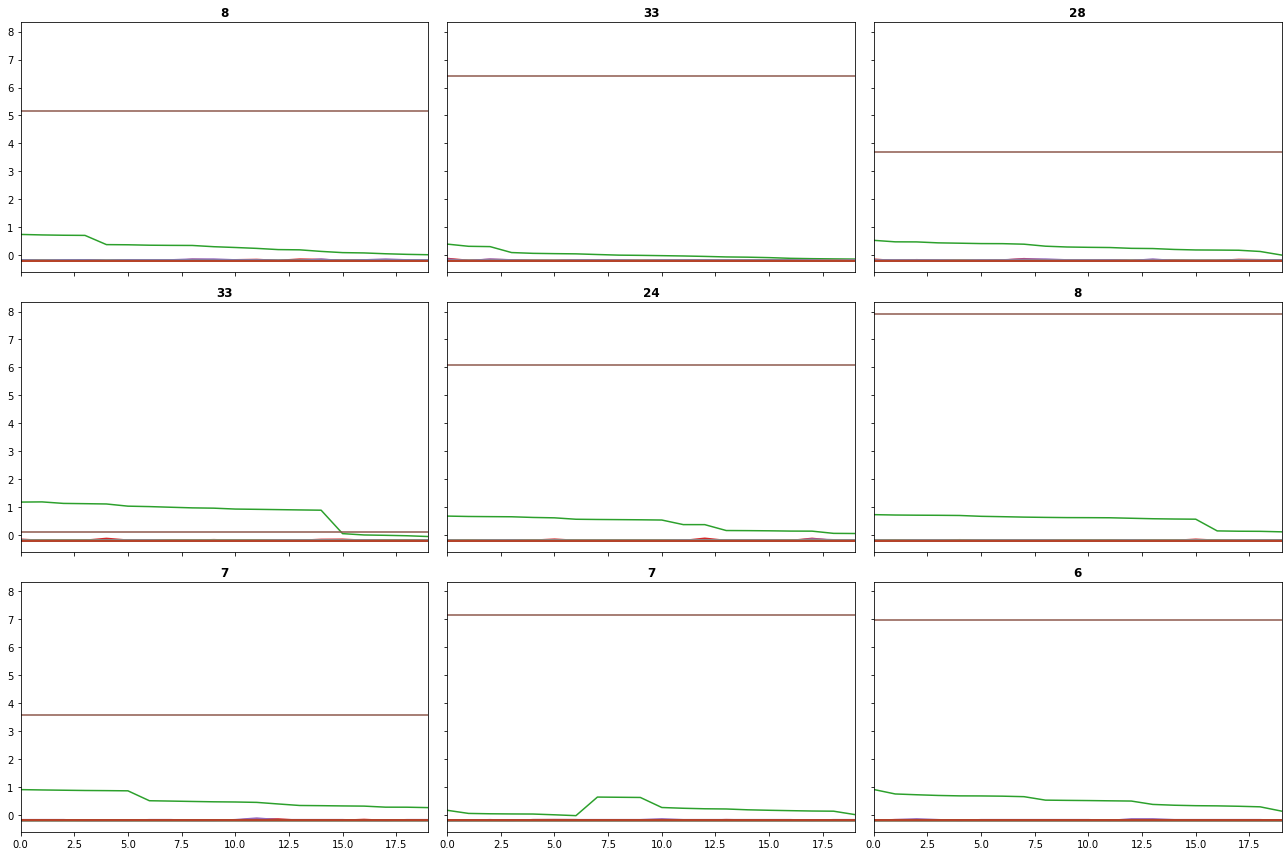

In [ ]:
dls.show_batch(sharey=True)

In [ ]:
model = LSTM(dls.vars, dls.c,n_layers=2, bidirectional=True)
model

LSTM(
  (rnn): LSTM(24, 100, num_layers=2, batch_first=True)
  (fc): Linear(in_features=100, out_features=55, bias=True)
)

epoch,train_loss,valid_loss,accuracy,time
0,2.282848,2.307718,0.312581,00:23
1,2.323724,2.310649,0.312581,00:23
2,2.332394,2.311110,0.312581,00:23
3,2.271559,2.276355,0.312531,00:23
4,2.177131,2.193496,0.316301,00:23
5,2.161853,2.156735,0.319823,00:23
6,2.172175,2.134542,0.323395,00:23
7,2.141529,2.123489,0.324288,00:23
8,2.141543,2.116981,0.324040,00:23
9,2.103218,2.110375,0.324338,00:23



training time: 00:07:52


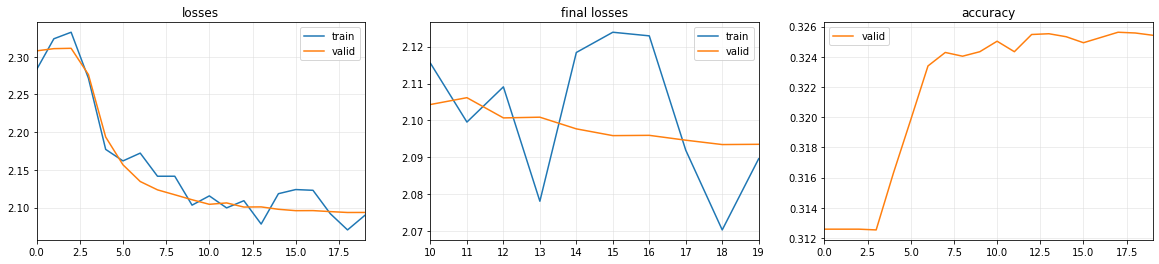

In [ ]:
#model = create_model(xresnet18, dls=dls, pretrained=True)
learn = Learner(dls, model, metrics=accuracy,  loss_func=CrossEntropyLossFlat())
start = time.time()
learn.fit_one_cycle(20, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
learn.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.102579,2.105680,0.324933,00:24
1,2.127579,2.117794,0.324040,00:23
2,2.131009,2.139681,0.323941,00:23
3,2.152557,2.112871,0.323891,00:24
4,2.109839,2.107940,0.324735,00:23
5,2.103992,2.102110,0.325578,00:23
6,2.110565,2.091450,0.325578,00:23
7,1.375764,1.349789,0.522621,00:24
8,1.289086,1.385426,0.501885,00:23
9,1.173278,1.180603,0.598670,00:23



training time: 00:15:48


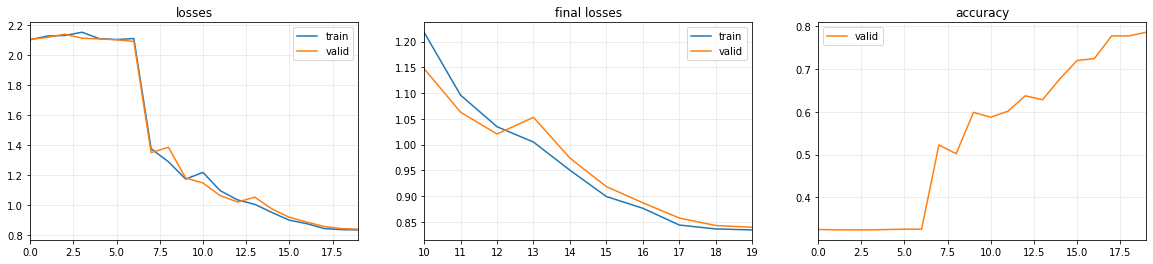

In [ ]:
learn.fit_one_cycle(20, lr_max=1e-2)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
learn.plot_metrics()

In [ ]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, batch_tfms=[TSNormalize(), TSToPlot()], num_workers=0)

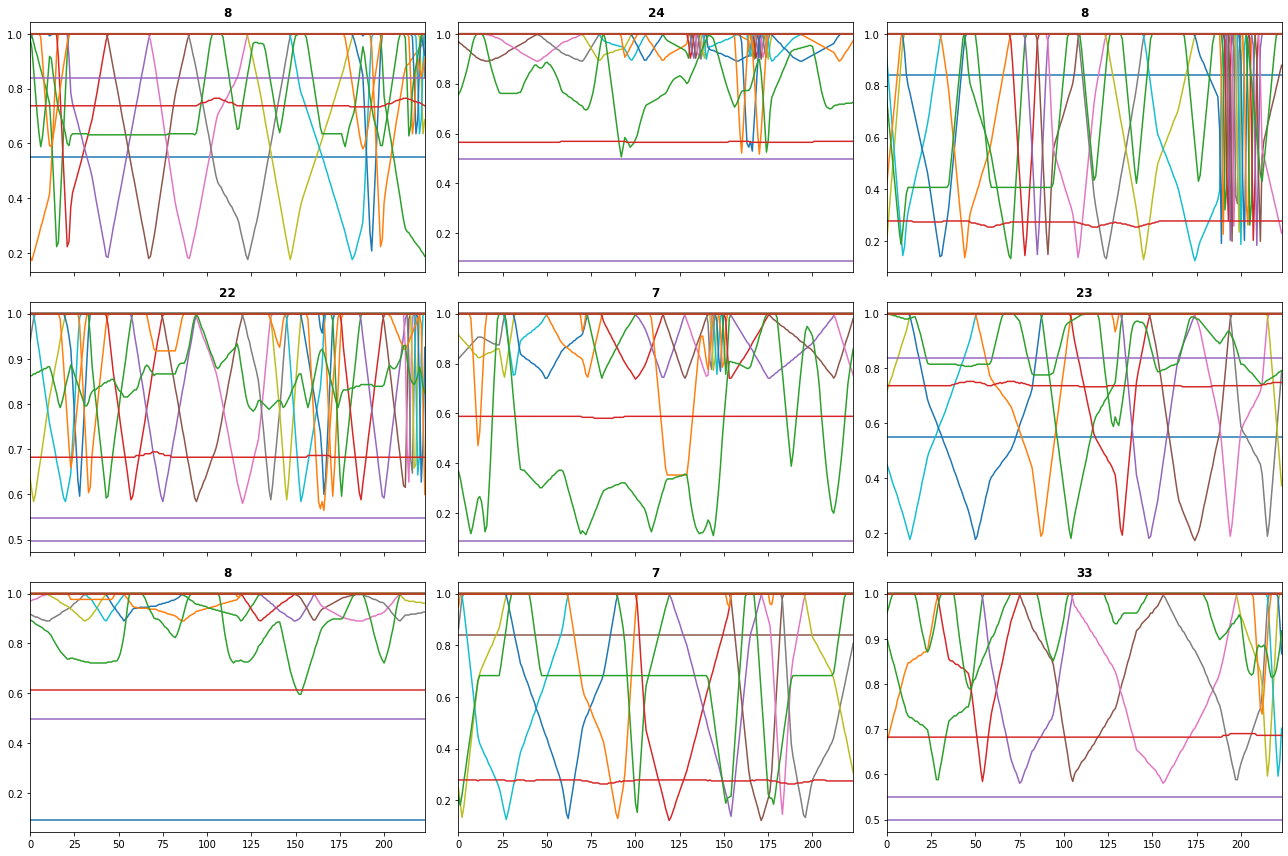

In [ ]:
dls.show_batch()

In [ ]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, batch_tfms=[TSNormalize(), TSToMTF(cmap='autumn')], num_workers=0)

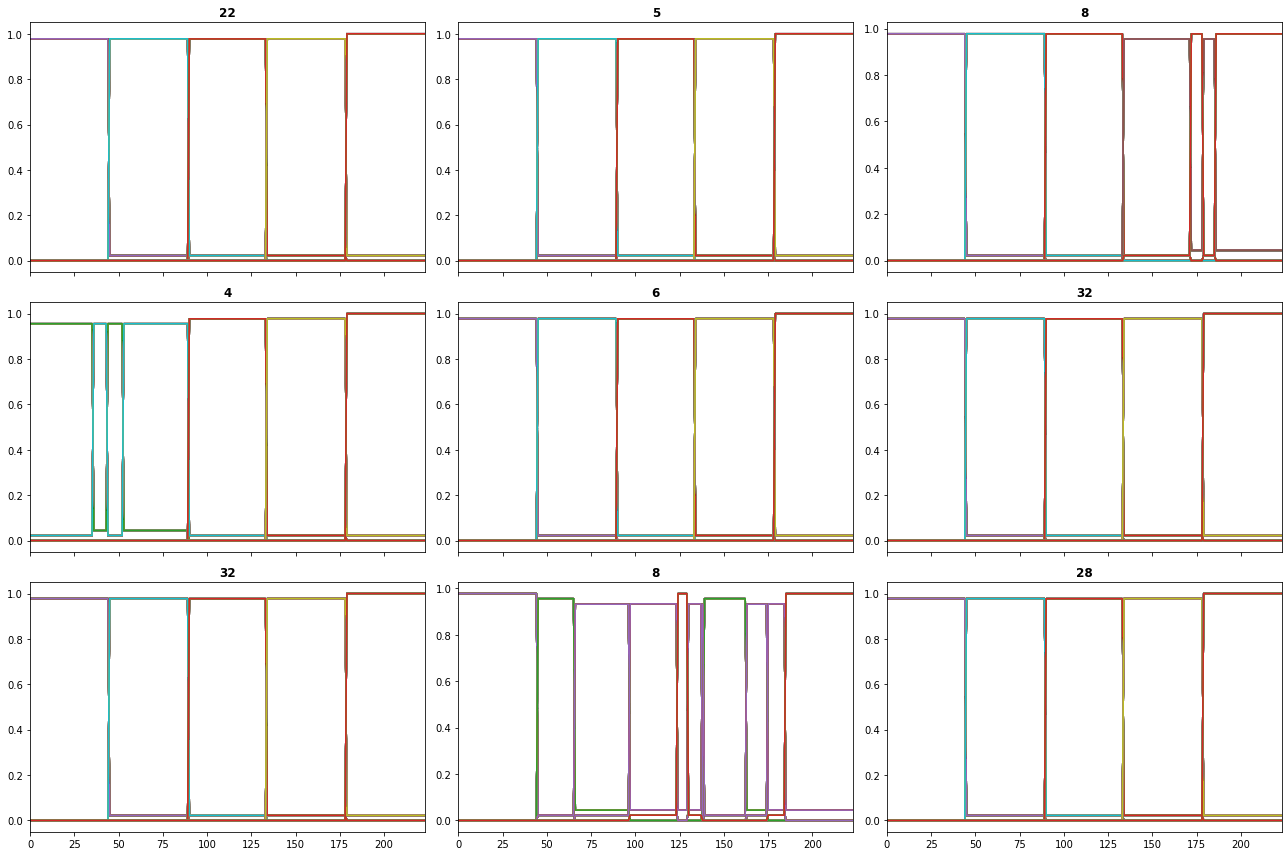

In [ ]:
dls.show_batch()

epoch,train_loss,valid_loss,accuracy,time
0,0.327297,0.432293,0.867497,33:30
1,0.178178,0.186459,0.939379,33:39
2,0.130433,0.131798,0.956146,33:42
3,0.088140,0.114267,0.961504,33:45



training time: 02:14:37


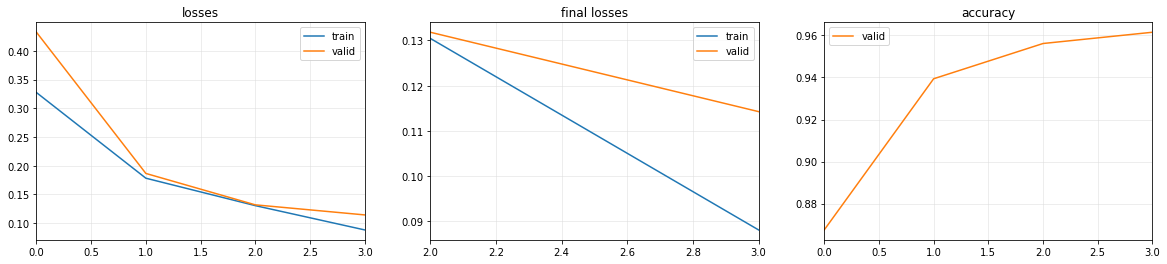

In [ ]:
model = create_model(xresnet18, dls=dls, pretrained=True)
learn = Learner(dls, model, metrics=accuracy)
start = time.time()
learn.fit_one_cycle(4, lr_max=1e-3)
print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
learn.plot_metrics()